# Assignment - Prediction of Health Costs for Insurance Industry

Let's move on to the exercise project on Health Insurance Cost Prediction

We are going to analyze the charges incurred by different patients and use the data to predict the possible charges for a future patient. Our key features are

* **age:** <br>age of primary beneficiary
* **sex:** <br>insurance contractor gender -- female / male
* **bmi:** <br>Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg/m^2)$ using the ratio of height to weight, ideally 18.5 to 24.9
* **children:** <br>Number of children covered by health insurance / Number of dependents
* **smoker:** <br>Smoking -- yes / no
* **region:** <br>the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges:** <br>Medical costs billed by health insurance

**`'charges'`** column is the **Dependent Variable or target column** because we want our algorithm to predict this cost based on all other features in the list.

**`The 6 features from age to region'`** are your **Features or Independent Variables** which will help you predict charges. Vary any one of them and it is going to affect your charges. Agreed?


## Basic Intuition 

In this section lets try to have a basic intuition behind what a Machine Learning Algorithm does to solve a Regression problem.

Now lets say you have to predict the Medical cost billed by insurance company based on customers age, sex, bmi and other data. There is no straight forward mathematical formula for that. This is where Machine learning comes to our aid.
<br><br>
The Machine learning model mostly tries to predict this function which best describes the data / best fits the data. 
<br> f(X) = (a x feature1) + (b x feature2) + (c x feature3) + ...
<br> ie, if you have the optimal values of a, b, c (called parameters of the model) you can predict your dependent variable close to actual value.
<br> But how to know if our function is the best function that describes our dataset. This brings us to a very impaortant stage in our pipeline which is Data Preprocessing.

# Assignment - Try to understand what each step is doing !!

### Many of the cells are already coded for you - in some places you need to write your own code

## Import and Load the Data

In [23]:
# RUN THIS CELL FIRST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# IMPORTING VARIOUS Regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [24]:
# run this cell - helper function
def display_predictions(y_test,predictions, n):
    Scores = pd.DataFrame({'Actual': y_test,'Predictions': predictions})
    return Scores.head(n)


In [25]:
# Loading the dataset into pandas dataframe and print the sample of first 5 rows
df = pd.read_csv('/Data/insurance_data.csv')
#Display the head of the data
df.head()

,age,bmi,children,smoker,obese,sex,charges
0,19,27.900,0,1,0,0,16884.92400
1,18,33.770,1,0,1,1,1725.55230
2,28,33.000,3,0,1,1,4449.46200
3,33,22.705,0,0,0,1,21984.47061
4,32,28.880,0,0,0,1,3866.85520


In [26]:
df.shape

(1338, 7)

# Do Exploratory Data Analysis

## Visualize the Pair Plots 

In [27]:
# Print out the column name for our reference later
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'obese', 'sex', 'charges'], dtype='object')

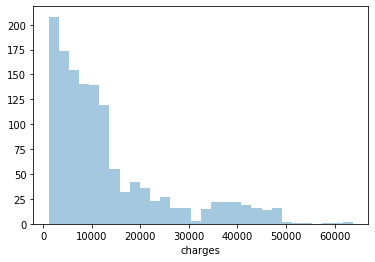

In [28]:
sns.distplot(df['charges'], kde=False)

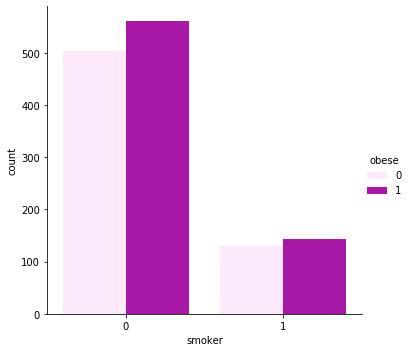

In [29]:
sns.factorplot(x="smoker", kind="count", hue ='obese', color='m', data=df);

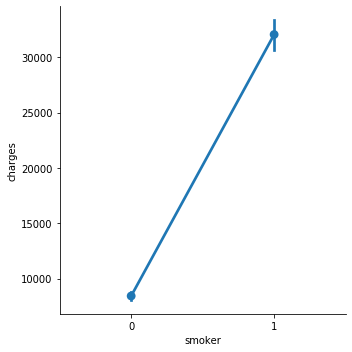

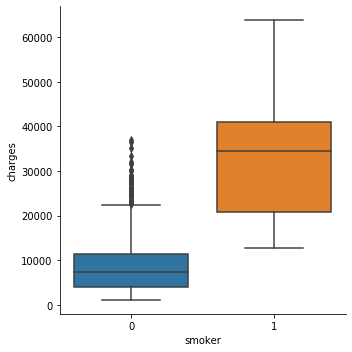

In [30]:
sns.factorplot(x='smoker', y='charges', data=df)
sns.factorplot(x='smoker', y='charges', data=df, kind='box')

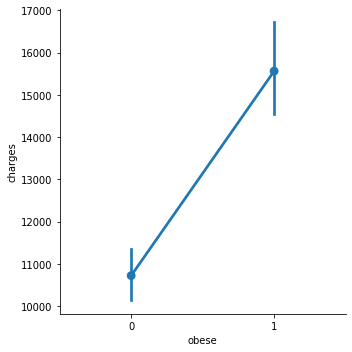

In [31]:
sns.factorplot(x='obese', y='charges', data=df)

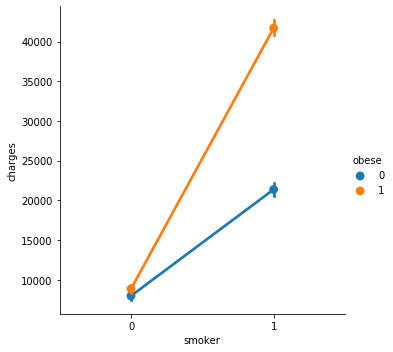

In [32]:
sns.factorplot(x='smoker', y='charges', hue='obese', data=df)

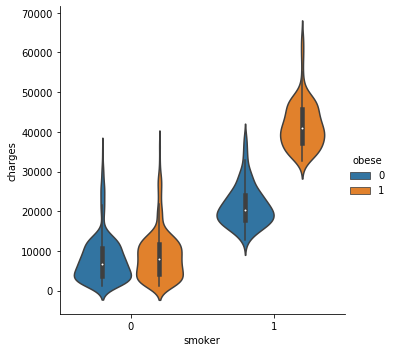

In [33]:
#sns.factorplot(x='smoker', y='charges', hue='obese', style='sex', data=df)

sns.factorplot(x="smoker", y="charges", hue="obese", kind="violin", data=df);

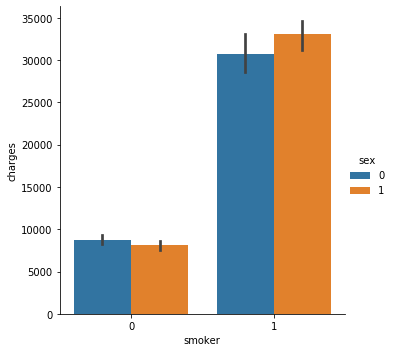

In [34]:
sns.factorplot(x="smoker", y="charges", hue="sex", kind="bar", data=df);

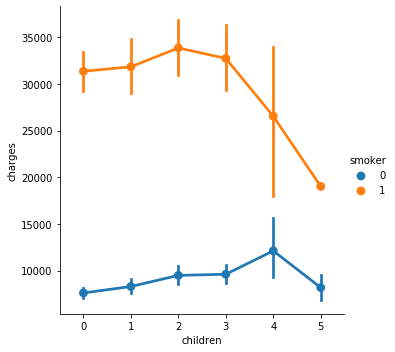

In [35]:
sns.factorplot(x='children', y='charges', hue ='smoker' ,data=df)

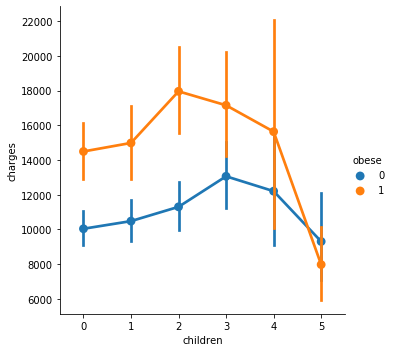

In [36]:
sns.factorplot(x='children', y='charges', hue ='obese' ,data=df)

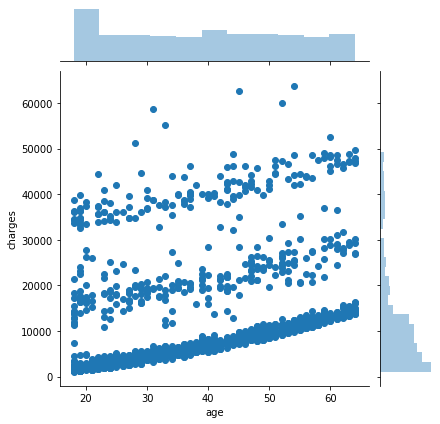

In [37]:
# Lets see how the charges vary with the age.
sns.jointplot(x='age', y='charges',data=df)

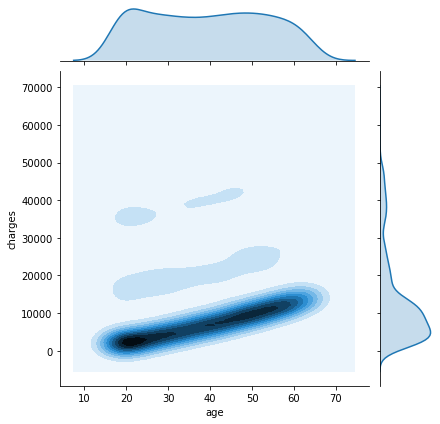

In [38]:
# Lets see how the charges vary with the age.
sns.jointplot(x='age', y='charges', data=df, kind='kde')

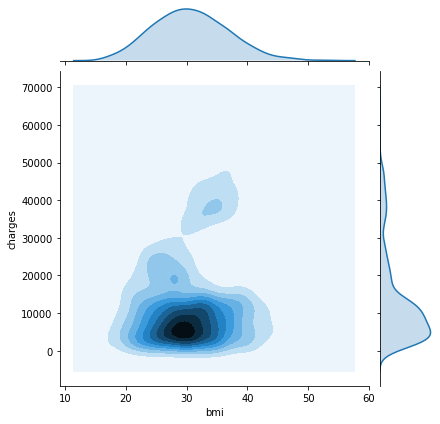

In [39]:
# Lets see how the charges vary with the age.
sns.jointplot(x='bmi', y='charges', data=df, kind='kde')

## Heatmap of Correlations

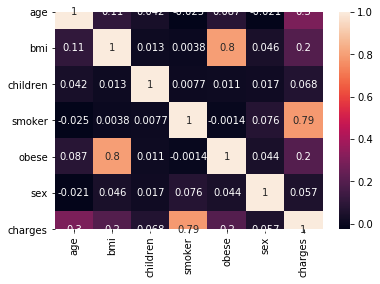

In [40]:
sns.heatmap(df[['age', 'bmi', 'children', 'smoker', 'obese', 'sex', 'charges']].corr()
            , annot=True)

In [ ]:
sns.pairplot(df[['age', 'bmi', 'children', 'smoker', 'obese', 'sex', 'charges']]) 

In [ ]:
# There seems to be three classes of patients, those for whom charges are less than 10K, 
# those for whom charges are between 11 and 30, those for whom expenses are more than 30K.
# Lets see the characteristics of these classes of customers.

In [ ]:
#Create a new dataframe low_df and describe
low_df = df[df.charges < 11000]
low_df.describe()

In [ ]:
med_df = df[(df.charges > 11000) & (df.charges < 30000)]
med_df.describe()

In [ ]:
high_df = df[(df.charges > 30000)]
high_df.describe()

In [ ]:
# We can see that the difference seems to be:
# charges less than 11K: do not smoke, significant obesity.
# charges between 11 and 30K: significant smokers, significant obesity.
# charges above 30K: high smokers, high obesity.

# Prediction - Start of Assignment 



In [41]:
# Load the data again
df = pd.read_csv('/Data/insurance_data.csv')
df.head()

,age,bmi,children,smoker,obese,sex,charges
0,19,27.900,0,1,0,0,16884.92400
1,18,33.770,1,0,1,1,1725.55230
2,28,33.000,3,0,1,1,4449.46200
3,33,22.705,0,0,0,1,21984.47061
4,32,28.880,0,0,0,1,3866.85520


In [ ]:
# print out the columns
df.columns

## Code for Generation of the Model Predictions

Replace the word None with the code needed

### Assignment 1 : Your coding starts here !

Fill the values of X and train_test_ratio

In [ ]:
#features will contain a list of columns you want to predict with -hint:  copy from the column list 

# #  choose from   ['age', 'bmi', 'children','smoker', 'obese', 'sex', 'charges']  

features =  None     

# Lets try to build a model which will estimate the charges based on the customer profile.
# Load the features which will be used to do the predictions into the variable X
X = df[features]

# Load the dependent variable, i.e. the costs to y
y = df['charges']


# Split the data into text and training


## Set the train_test_ratio here

train_test_ratio=None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_ratio, random_state=1)
print('Size of training dataset = ', X_train.shape[0])
print('Size of test dataset = ', X_test.shape[0])

# Let's create an instance for the LinerRegression model
lr = LinearRegression()
print('Model created: ', lr)


# Train the model on our train dataset
lr.fit(X_train,y_train)
print('Model trained: ', lr)


# Getting predictions from the model 
predictions = lr.predict(X_test)
print('\nPrediction complete!')

print('\n ACCURACY METRICS :\n')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared' , metrics.r2_score(y_test, predictions))


### Display the Co-efficients  and intercept

In [ ]:
#Display intercept
lr.intercept_

In [ ]:
#Display coefficient
coeffs = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeffs

### As we can see, smoking and obesity has a high impact on the charges.

####  Optional -  Get Predictions on Test Data

In [ ]:
## Compare Actuals vs Predictions
no_of_predictions =10
display_predictions(y_test,predictions, no_of_predictions)

#  Assignment 2 - Rebuild Model with an additional feature.

In [ ]:
# Our model accuracy is 74% which is not that great.
# Now we think what we can do to improve the accuracy. There are many possibilities including trying other
# ML algorithms, collecting data on more customers, collecting more information (other habits which could be
# influencing the charges).

# We decide to look further within the data we already have. 
# Is it possible that if someone is a smoker and is obese, it has 
# a compounding instead of linear effect on the charges? If so, we need a feature which is the product
# of the two.

In [42]:
# We create a new feature which is the product of the two existing features.

df = pd.read_csv('/Data/insurance_data.csv')



In [43]:
df.head()

,age,bmi,children,smoker,obese,sex,charges
0,19,27.900,0,1,0,0,16884.92400
1,18,33.770,1,0,1,1,1725.55230
2,28,33.000,3,0,1,1,4449.46200
3,33,22.705,0,0,0,1,21984.47061
4,32,28.880,0,0,0,1,3866.85520


In [44]:
## Add a new feature
df['smokOb'] = df['smoker'] * df['obese']


In [45]:
df.head()

,age,bmi,children,smoker,obese,sex,charges,smokOb
0,19,27.900,0,1,0,0,16884.92400,0
1,18,33.770,1,0,1,1,1725.55230,0
2,28,33.000,3,0,1,1,4449.46200,0
3,33,22.705,0,0,0,1,21984.47061,0
4,32,28.880,0,0,0,1,3866.85520,0


In [46]:
df.smokOb.value_counts(normalize=True)

0    0.892377
1    0.107623
Name: smokOb, dtype: float64

In [ ]:
# We have an extra feature 'smokOb' now. 
# Roughly 11% of the customers have both these features (144/1338).
# We will repeat the model building and validation
# with the extra feature.

## Use the following code template
### The only change is in loading the X  variables

Replace the word None with the code which is required


In [47]:
#get column list
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'obese', 'sex', 'charges',
       'smokOb'],
      dtype='object')

### Assignment 2 : Your coding starts here !

Fill the values of X and train_test_ratio

In [48]:
#features will contain a list of columns you want to predict with -hint:  copy from the column list 

# #  choose from   ['age', 'bmi', 'children','smoker', 'obese', 'sex','smokOb', 'charges']  
  

# Lets try to build a model which will estimate the charges based on the customer profile.
# Load the features which will be used to do the predictions into the variable X
X = df[['age', 'bmi','smoker', 'obese', 'sex','smokOb']]

# Load the dependent variable, i.e. the costs to y
y = df['charges']


# Split the data into text and training


## Set the train_test_ratio here

train_test_ratio=.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_test_ratio, random_state=1)
print('Size of training dataset = ', X_train.shape[0])
print('Size of test dataset = ', X_test.shape[0])

# Let's create an instance for the LinerRegression model
lr = LinearRegression()
print('Model created: ', lr)


# Train the model on our train dataset
lr.fit(X_train,y_train)
print('Model trained: ', lr)


# Getting predictions from the model 
predictions = lr.predict(X_test)
print('\nPrediction complete!')

print('\n ACCURACY METRICS :\n')
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared' , metrics.r2_score(y_test, predictions))


Size of training dataset =  1137
Size of test dataset =  201
Model created:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Model trained:  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction complete!

 ACCURACY METRICS :

MAE: 2397.6752374396615
MSE: 18998958.35055166
RMSE: 4358.779456516659
R-squared 0.8660153903962764


In [ ]:
## Compare Actuals vs Predictions
display_predictions(y_test,predictions, 10)

In [ ]:
# Model accuracy has improved by 12% points!!! 

# Congratulations - you have solved a Regression Problem  !!

In [ ]:
# Now Try some of these regressors 

In [ ]:
# IMPORTING VARIOUS Regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Solutions for  Assignments

In [ ]:
# We create a new feature which is the product of the two existing features.

df = pd.read_csv('/Data/insurance_data.csv')

## Add a new feature
df['smokOb'] = df['smoker'] * df['obese']

df.head()

In [ ]:
features = ['age', 'bmi', 'children', 'smoker', 'obese', 'sex', 'smokOb']

 
# Lets try to build a model which will estimate the charges based on the customer profile.
# Load the features which will be used to do the predictions into the variable X
X = df[features]

# Load y variable
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#Instantiate the algorithm
lr = linear_model.LinearRegression()

# Training the model on our train dataset
lr.fit(X_train,y_train)

# Get predictions
predictions = lr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R-squared' , metrics.r2_score(y_test, predictions))


In [ ]:
## Display the Coeffs of new model

In [ ]:
coeffs = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeffs

In [ ]:
# Getting predictions from the model 
display_predictions(y_test,predictions,10)
